**Section 8.2 - Demonstration of Outliers and Leverages** <br>
This demonstration is for generating the figure which demonstrates the nature of problematic outliers in linear regression.

Required packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generating fake data

We first generate fake data that consists a noisy observation of the data coming from $y = f(x) = x$, evaluated at `x = np.arange(-1,10,.5)`. The noise for each points are iid normal with mean zero and variance standard deviation 0.25. We then modify the data points for illustration.

In [101]:
rng = np.random.default_rng(1234)  # this is to set seed for random generator for reproducibility
x0 = np.arange(-1,5,.5)
y0 = x0 + rng.normal(0,.5,12)

# we then create new datasets by removing one point from y1 and replacing it with a problematic point.
del_idx = 4
x_del = np.delete(x0, del_idx)
y_del = np.delete(y0, del_idx)

# normal
x1 = np.append(x_del, x0[del_idx])
y1 = np.append(y_del, y0[del_idx])

# points with low leverage and high standard residual
x2 = np.append(x_del, x0[del_idx])
y2 = np.append(y_del, 9.75)

# points with high leverage and low standard residual
x3 = np.append(x_del, 10)
y3 = np.append(y_del, 9.75)

# points with high leverage and high standard residual
x4 = np.append(x_del, 10)
y4 = np.append(y_del, 2)

We then define a routine to help us to quickly plot the points, alongside with the regression lines when the problematic point exists or not.

In [102]:
def regression_plot(x,y,x_del,y_del,title,ax):
    # design matrix
    design_mat = np.vstack((np.ones(x.shape), x)).T
    design_mat_del = np.vstack((np.ones(x_del.shape), x_del)).T

    # computing slope
    intercept, slope = np.linalg.lstsq(design_mat, y, rcond=None)[0]
    intercept_del, slope_del = np.linalg.lstsq(design_mat_del, y_del, rcond=None)[0]

    # coordinates for ploting lines
    x_plot = np.array([x.min(), x.max()])
    print(x_plot)
    y_plot = x_plot * slope + intercept
    y_plot_del = x_plot * slope_del + intercept_del

    # plotting graphs
    ax.scatter(x_del, y_del, color="blue")
    ax.scatter(x[-1], y[-1], color="red")
    ax.plot(x_plot, y_plot, color="red")
    ax.plot(x_plot, y_plot_del, color="blue")
    ax.set_title(title)

We then plot the data, which now becomes Figure 1 in the main article.

[-1.   4.5]
[-1.   4.5]
[-1. 10.]
[-1. 10.]


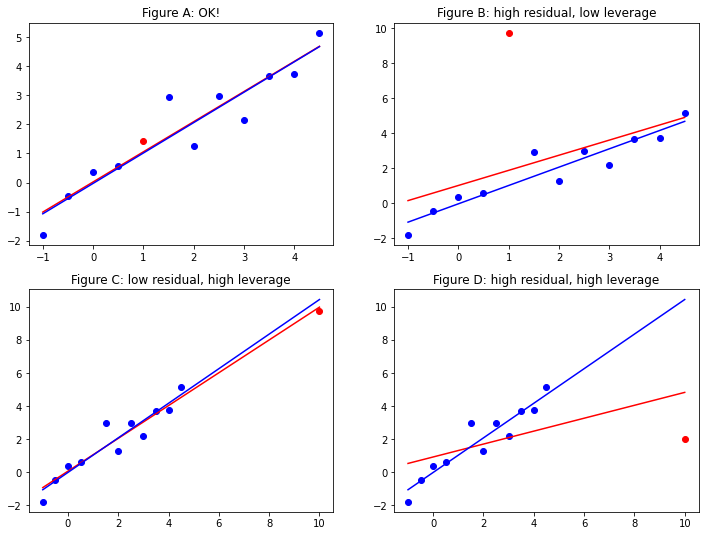

In [103]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,9))
regression_plot(x1, y1, x_del, y_del, "Figure A: OK!", ax=ax[0,0])
regression_plot(x2, y2, x_del, y_del, "Figure B: high residual, low leverage", ax=ax[0,1])
regression_plot(x3, y3, x_del, y_del, "Figure C: low residual, high leverage", ax=ax[1,0])
regression_plot(x4, y4, x_del, y_del, "Figure D: high residual, high leverage", ax=ax[1,1])